# 行列・ベクトル表現のプログラム

このページは以下のリンクより， google colaboratoryから動作させることができる．
- [Open with Colab](https://colab.research.google.com/github/crotsu/Bousai_AI/blob/master/chap3_NeuralNetwork/chap3_3_vector.ipynb)

学習前の重み
weight2
 [[0.03047874 0.12488869]]
weight1
 [[-0.12545716  0.00649656]
 [ 0.23576817  0.23777585]]
threshold2
 [-0.22464881]
threshold1
 [-0.17565427 -0.26911968]

学習後の出力
[0.0414445]
[0.96351133]
[0.9505134]
[0.03659809]

学習後の重み
weight2
 [[ 1.94160515 -1.88352047]]
weight1
 [[-1.54233543  1.59706229]
 [-1.20692586  1.29075543]]
threshold2
 [0.88111979]
threshold1
 [-0.91773575  0.57978225]



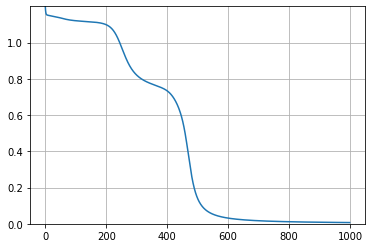

In [9]:
# ニューラルネットワークのBP法による学習
# ベクトルと行列を用いたプログラム

import numpy as np
import matplotlib.pyplot as plt

# 乱数の種を設定
np.random.seed(3)

# パラメータ
EPSILON = 4.0 # シグモイド関数の傾き
ETA = 0.1     # 学習係数
TIME = 1000   # 学習回数

# シグモイド関数
def sigmoid(x):
    return 1/(1+np.exp(-1*EPSILON*x))

# 入力（XORの入力部分）
dataX = np.array(
    [[0,0],
     [0,1],
     [1,0],
     [1,1]]
)

# 教師信号（XORの出力部分）
dataY = np.array(
    [[0],
     [1],
     [1],
     [0]]
)

# XORなので，
# 入力層のニューロン:1
# 出力層のニューロン:2
# は固定

# 中間層のニューロンは可変
num_hidden = 2

# 初期重みと初期閾値をランダムに与える(1が階層が下，2が階層が上)
# weight_###[上][下]
# 例: wacはweight2[0][1]
weight2 = (np.random.rand(1, num_hidden)-0.5)*2 * 0.3 # -0.3から0.3の一様乱数
weight1 = (np.random.rand(num_hidden, 2)-0.5)*2 * 0.3
threshold2 = (np.random.rand(1)-0.5)*2 * 0.3
threshold1 = (np.random.rand(num_hidden)-0.5)*2 * 0.3

# 重みを表示
print("学習前の重み")
print('weight2\n', weight2)
print('weight1\n', weight1)
print('threshold2\n', threshold2)
print('threshold1\n', threshold1)
print()

# 誤差曲線のグラフ表示用
x = []
y = []

# 学習
for t in range(TIME):

    outall = []
    errorAll = 0.0
    for p in range(len(dataX)):

        # 前向き計算
        out1 = sigmoid(np.dot(weight1, dataX[p]) + threshold1)
        out2 = sigmoid(np.dot(weight2, out1) + threshold2)

        # 誤差計算
        outall.append(out2)
        errorAll += (out2 - dataY[p])**2

        # Back Propagation
        delta2 = (out2 - dataY[p]) * EPSILON * (1.0 - out2) * out2
        delta1 = delta2 * weight2 * EPSILON * (1.0 - out1) * out1

        weight2 -= ETA * delta2 * out1
        for i in range(num_hidden):
            weight1[i] -= ETA * delta1[0][i] * dataX[p]

        threshold2 -= ETA * delta2
        threshold1 -= ETA * delta1[0]

    # 誤差曲線のグラフ表示用の変数
    x.append(t)
    y.append(errorAll)

# 学習後の出力
print("学習後の出力")
print(outall[0])
print(outall[1])
print(outall[2])
print(outall[3])
print()

# 重みを表示
print("学習後の重み")
print('weight2\n', weight2)
print('weight1\n', weight1)
print('threshold2\n', threshold2)
print('threshold1\n', threshold1)
print()

# 誤差曲線のグラフ表示
plt.plot(x, y)
# 適切な表示範囲を指定
ymin = 0.0
ymax = y[0]
plt.ylim(ymin, ymax)
# グリッド追加
plt.grid(True)
# 表示
plt.show()